# Modeling with Differential Equations

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

**Worked Example**
Read Calculus in Context, Chapter 4. This explores additional models that can be explored using this method. 
Copy and paste SIR plot here and  modify to model the Lotka-Voerra Model from page 193 number 7. Explore some of the questions a - f on your own and add some short notes about this model. note: The scaling factor for lynx is 60 (page 194, part c)."plot H and 60L"




[2000, 2100.0, 2200.8, 2301.4029696000002, 2400.603653020439, 2496.9703093270105, 2588.8319025254723, 2674.2743187625715, 2751.150170427383, 2817.10765858495, 2869.6445535631897, 2906.1932307864713, 2924.241343678117, 2921.4895368742555, 2896.0421095018914, 2846.6186396179974, 2772.7649986595766, 2675.0328341838895, 2555.0906604717584, 2415.731013261584, 2260.7497222109614, 2094.6953883147353, 1922.5153343921988, 1749.1502202999568, 1579.1436438398098, 1416.3293186472235, 1263.6377533699829, 1123.034530421599, 995.5739850860148, 881.5337244664107, 780.5899457137053, 691.9986224772891, 614.7583716095991, 547.7423792907612, 489.796099877707, 439.8034469399282, 396.72713847825474, 359.6296035238723, 327.6803274083503, 300.1544236538483, 276.42602393841463, 255.95900774478474, 238.296738188928, 223.05183660531543, 209.896584953098, 198.55425003696678, 188.7914367963604, 180.41146638428083, 173.24871327926337, 167.16380619743143, 162.03958767721602, 157.77772865213726, 154.29590181052308, 1

Text(0.5, 1.0, 'Hare and Lynx Populations')

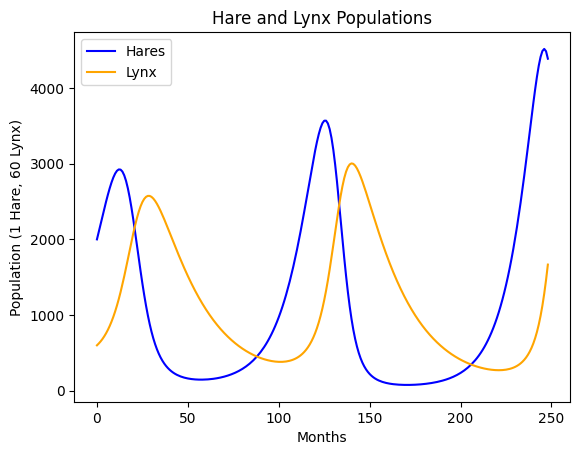

In [2]:
def lynxHare(num_hare, num_lynx, t_final):
    # time variables
    t_initial = 0
    t = t_initial
    # Starting values at the beginning of model for hares and lynx (turns out the plural of lynx is just lynx)
    H = num_hare
    L = num_lynx

    # Hares per month per hare
    a = .1
    # Hares per month per hare-lynx
    b = .005
    # Lynx per month per hare-lynx
    c = .00004
    # Lynx per month per lynx
    d = .04

    # Creating empty arrays to hold values we will plot
    H_graph = []
    L_graph = []

    # Change in time/number of steps
    delta_t = 1
    # Iterating through the number of line segments in our plot (the more lines, the smoother the graph)
    for k in range (1, t_final):
        # Add current values to graph vectors (include Lynx scaling factor of 60)
        H_graph.append(H)
        L_graph.append(60*L)
        # Rate of change in Hare population
        Hprime = a*H - b*H*L
        # Rate of change in Lynx population
        Lprime = c*H*L - d*L
        
        # Actual change in Hare and Lynx populations
        delta_H = Hprime*delta_t
        delta_L = Lprime*delta_t

        #Updating the values of t, H, and L with our delta values
        t = t + delta_t
        H = H + delta_H
        L = L + delta_L

    # return the arrays with values over each step
    return H_graph, L_graph


# Plot the populations
H_line, L_line= lynxHare(2000, 10, 250)
print(H_line)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Hare and Lynx Populations')    

The graph above shows part C of number 7 on p. 193-194 of Calculus in Context, beginning with 2,000 hares and 10 lynx.  It includes the basic assumptions of the two species model:

* In the absence of lynx, the hare population grows logistically - we see this in the equation for Hprime, where if the lynx population is 0 then the hare population is aH 
* The population of hares declines in proportion to to H*L - see this in the second half of the equation for Hprime, -bHL.  Both of these assumptions can be seen in the rise and fall of the blue line, which represents the hare population
* In the absence of hares, the lynx die of proportional to the number of lynx - the equation for Lprime shows that if H is 0, then the lynx decline at a rate of dL (and is demonstrated by the declines in the orange line, which occur following the decline of the blue line representing hares)
* The lynx population increases proportionately to the number of encounters between lynx and hares - this can be seen in the first half of Lprime, cHL where c represents lynx per month per hare-lynx.

The hare-lynx units are especially interesting, as they complicate the model to include not only the populations of predators and prey, but also the encounters between the two (R.I.P. hares).

Below are the graphs for parts D and F of number 7, showing both the hare and lynx populations when L=20 and L=50.  Doubling the lynx population from our initial graph condensed it, but changing it 50 did the opposite, spreading out the population peaks and valleys further over the 250 months.

Text(0.5, 1.0, 'Lynx pop. = 20')

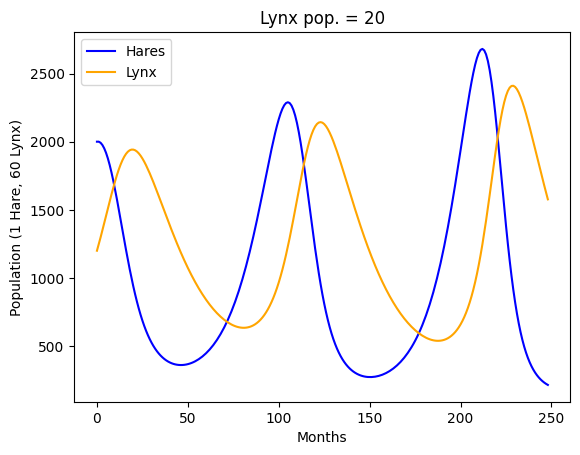

In [3]:
H_line, L_line= lynxHare(2000, 20, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Lynx pop. = 20') 

Text(0.5, 1.0, 'Lynx pop = 50')

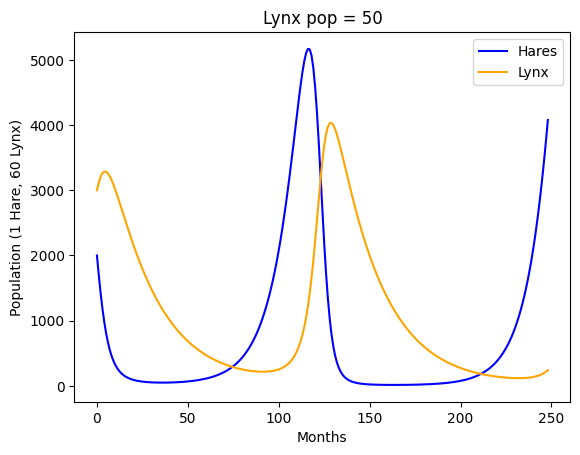

In [4]:
H_line, L_line= lynxHare(2000, 50, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Lynx pop = 50') 

**Activity One:**
Do all parts of the May Model, 4.1 question 6. 


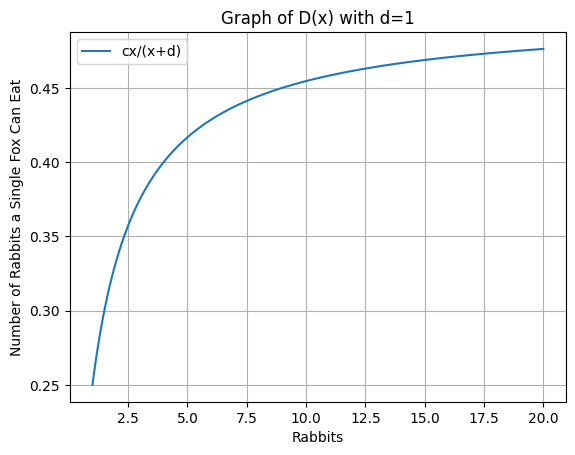

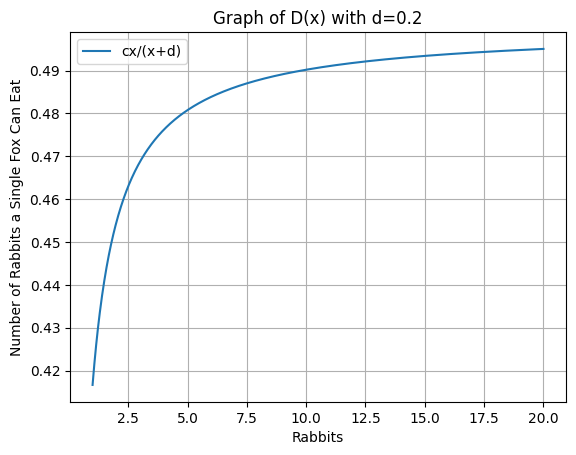

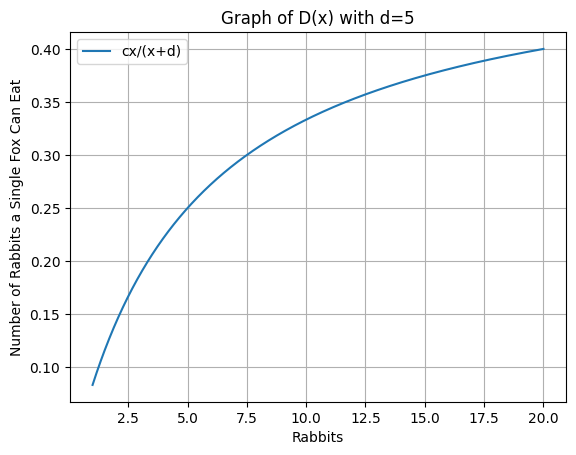

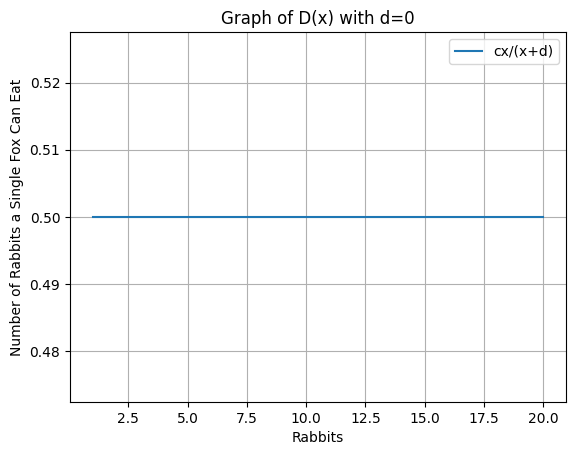

In [5]:
# the number of rabbits a single fox can eat in a given time period is a function D(x)
    # of the number of rabbits available
# D(x) varies from 0 if there are no rabbits available to some value c (the saturation value)
    # if there is an unlimited supply of rabbits

def D_x(c, x, d):
    return (c * x) / (x + d)

def D_x_plot(sat_val, num_rabbits, d):
    # set initial conditions
    # D = 0
    # c = sat_val
    # x = num_rabbits
    # d = unknown_var

    x_points = np.linspace(1, num_rabbits, 1000)
    y_points = D_x(sat_val, x_points, d)

    plt.plot(x_points, y_points, label=r'cx/(x+d)')
    plt.grid(True)
    plt.title(f'Graph of D(x) with d={d}')
    plt.xlabel('Rabbits')
    plt.ylabel('Number of Rabbits a Single Fox Can Eat')
    plt.legend()
    plt.show()

D_x_plot(0.5, 20, 1)
D_x_plot(0.5, 20, 0.2)
D_x_plot(0.5, 20, 5)
D_x_plot(0.5, 20, 0)

#### a) explain D(x) and param d

$$D(x) = \frac{cx}{x+d}$$

This model might be a reasonable model for the number of rabbits a single fox can eat in a given time period because it models the real life constraint that a fox would have in consuming rabbits over a given time period $c$, which sets a cap on the number of rabbits that can be consumer—regardless of how many rabbits there are.

The division in this equation accounts for the fact that if there are fewer rabbits, a fox will eat fewer rabbits. The $d$ parameter above is an interaction coefficient. It accounts for how easy or difficult it is for the fox to kill the rabbits. As we can see in the graphs above, when $d = 0$ the foxes simply eat at their saturation level. As the value of $d$ increases, it becomes more difficult for the foxes to eat the rabbits—and thus a larger population of rabbits is required for the foxes to hit their saturation point.

#### b) Explain system of equations

$$x^{\prime} = ax(1 - \frac{x}{b}) - \frac{cxy}{x + d}$$

$$y^{\prime} = ey(1 - \frac{y}{fx})$$

We can look at the model assumptions and see how each assumptions maps into these equations.

*"In the absence of foxes, rabbits grow logistically."*

We can see this assumption built into the first part of $x^{\prime}$:

$$ax(1 - \frac{x}{b})$$

is the logistic equation we were introduced to on p. 183 where $a$ is the natural growth rate of the rabbit population ($x$) and $b$ is the environmental carrying capacity.

*"The number of rabbits a single fox can eat in a given time period is a function D(x) of the number of rabbits available."*

As noted in the previous problem, this assumption is incorporated into the second half of $x^{\prime}$:

$$- \frac{cxy}{x + d}$$

where this single fox consumption term is then multiplied by $y$ the number of foxes in the population. Logically, the number of rabbits consumed by foxes is subtracted from the rabbit population growth term to give the overall growth rate of the rabbit population account for predation.

*"The fox population is governed by the logistic equation, and the carrying capacity is proportional to the number of rabbits."*


$$ey(1 - \frac{y}{fx})$$

Again, we see the same logistic equation for the foxes with $e$ being the natural growth rate of the fox population. The only difference here is that the carrying capacity is not encoded directly in a single term, but is proportional to the number of rabbits with this proportion be given by the $f$ term.

As we can see, this system of equations correctly captures our model assumptions.


#### c) Model system of equations

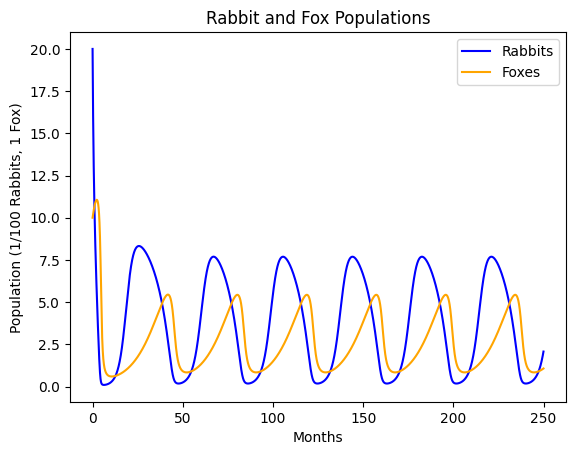

In [6]:
def mayModel(num_rabbits, num_foxes, t_final, rabbit_sat=0.5, inter_coef=1):
    # set model starting values
    t_initial = 0
    t = t_initial
    num_steps = t_final * 100   # 100 data points per time step
    R = num_rabbits / 100   # centirabbits
    F = num_foxes

    # parameters of the model
    # rabbits growth rate (centirabbits per month per centirabbit)
    a = 0.6
    # carrying capacity of rabbits (in centirabbits)
    b = 10
    # saturation value 
    c = rabbit_sat
    # the interaction value
    d = inter_coef
    # foxes growth rate (foxes per month per fox)
    e = 0.1
    # carrying capacity of foxes (proportional to centirabbits)
    f = 2

    # store values for plotting
    R_data = []
    F_data = []
    t_data = []

    # change in time/number of steps
    delta_t = (t_final - t_initial)/num_steps

    for _ in range(0, num_steps):
        # store current values for plotting
        R_data.append(R)  # rabbits scaled down by 100 (centirabbits)
        F_data.append(F)
        t_data.append(t)

        # rate of change in rabbit pop.
        Rprime = a * R * (1 - R / b) - c * R * F / (R + d)
        # rate of change in fox pop.
        Fprime = e * F * (1 - F / (f * R))

        # calculate incremental pop. changes
        delta_R = Rprime * delta_t
        delta_F = Fprime * delta_t

        # update time counter and total pop. values
        R = R + delta_R
        F = F + delta_F
        t = t + delta_t
    
    return R_data, F_data, t_data


# Plot the populations
R_points, F_points, t_points = mayModel(2000, 10, 250)
plt.plot(t_points, R_points, color='blue', label='Rabbits');
plt.plot(t_points, F_points, color='orange', label='Foxes');
plt.legend(['Rabbits', 'Foxes']);
plt.xlabel('Months');
plt.ylabel('Population (1/100 Rabbits, 1 Fox)');
plt.title('Rabbit and Fox Populations');

As we can see, the model predict the rabbit population will drop significantly—almost the the point of extinction—but then grow again to around 800 rabbits. The fox population will grow slightly, but then decline precipitously with a slight lag behind the rabbit population. The fox population will then grow again to 5 foxes lagging behind the growth of the rabbit population. This cycle of "boom and bust" will continue to oscillate indefinitely.

#### d) Modify the initial values

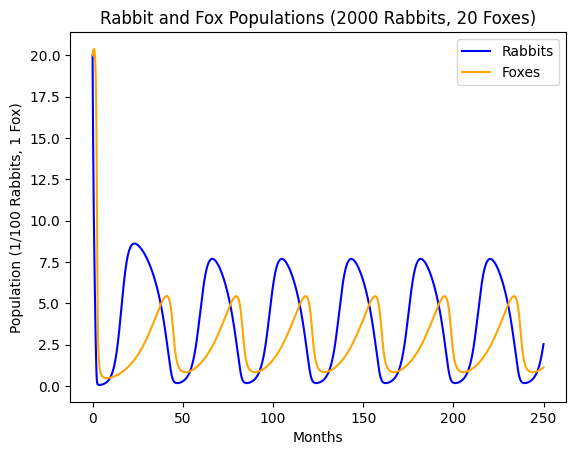

In [7]:
# 2000 rabbits and 20 foxes

# Plot the populations
R_points, F_points, t_points = mayModel(2000, 20, 250)
plt.plot(t_points, R_points, color='blue', label='Rabbits');
plt.plot(t_points, F_points, color='orange', label='Foxes');
plt.legend(['Rabbits', 'Foxes']);
plt.xlabel('Months');
plt.ylabel('Population (1/100 Rabbits, 1 Fox)');
plt.title('Rabbit and Fox Populations (2000 Rabbits, 20 Foxes)');


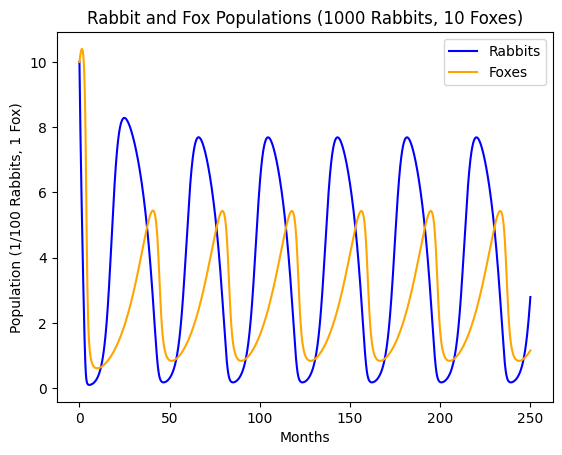

In [8]:
# 1000 rabbits and 10 foxes

# Plot the populations
R_points, F_points, t_points = mayModel(1000, 10, 250)
plt.plot(t_points, R_points, color='blue', label='Rabbits');
plt.plot(t_points, F_points, color='orange', label='Foxes');
plt.legend(['Rabbits', 'Foxes']);
plt.xlabel('Months');
plt.ylabel('Population (1/100 Rabbits, 1 Fox)');
plt.title('Rabbit and Fox Populations (1000 Rabbits, 10 Foxes)');

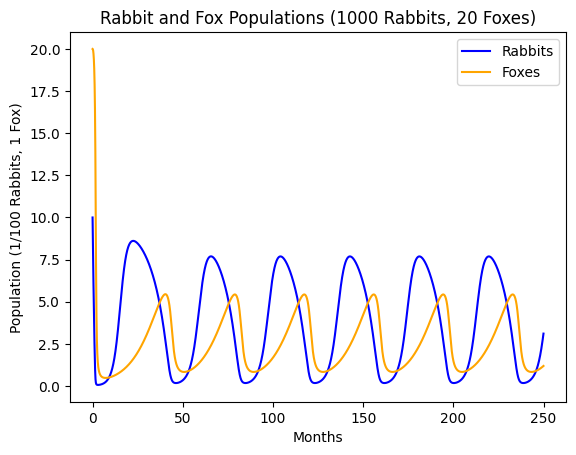

In [9]:
# 1000 rabbits and 20 foxes

# Plot the populations
R_points, F_points, t_points = mayModel(1000, 20, 250)
plt.plot(t_points, R_points, color='blue', label='Rabbits');
plt.plot(t_points, F_points, color='orange', label='Foxes');
plt.legend(['Rabbits', 'Foxes']);
plt.xlabel('Months');
plt.ylabel('Population (1/100 Rabbits, 1 Fox)');
plt.title('Rabbit and Fox Populations (1000 Rabbits, 20 Foxes)');

As we can see in the three graphs above, it appears that the long term populations dynamics do not depend on the initial conditions. In comparison to the Lynx-Hare Lotka-Volterra model, this is different because the Lotka-Volterra long term model behavior is highly dependent on the initial conditions, as can be seen in the example graphs above.

#### e) Modify the c parameter

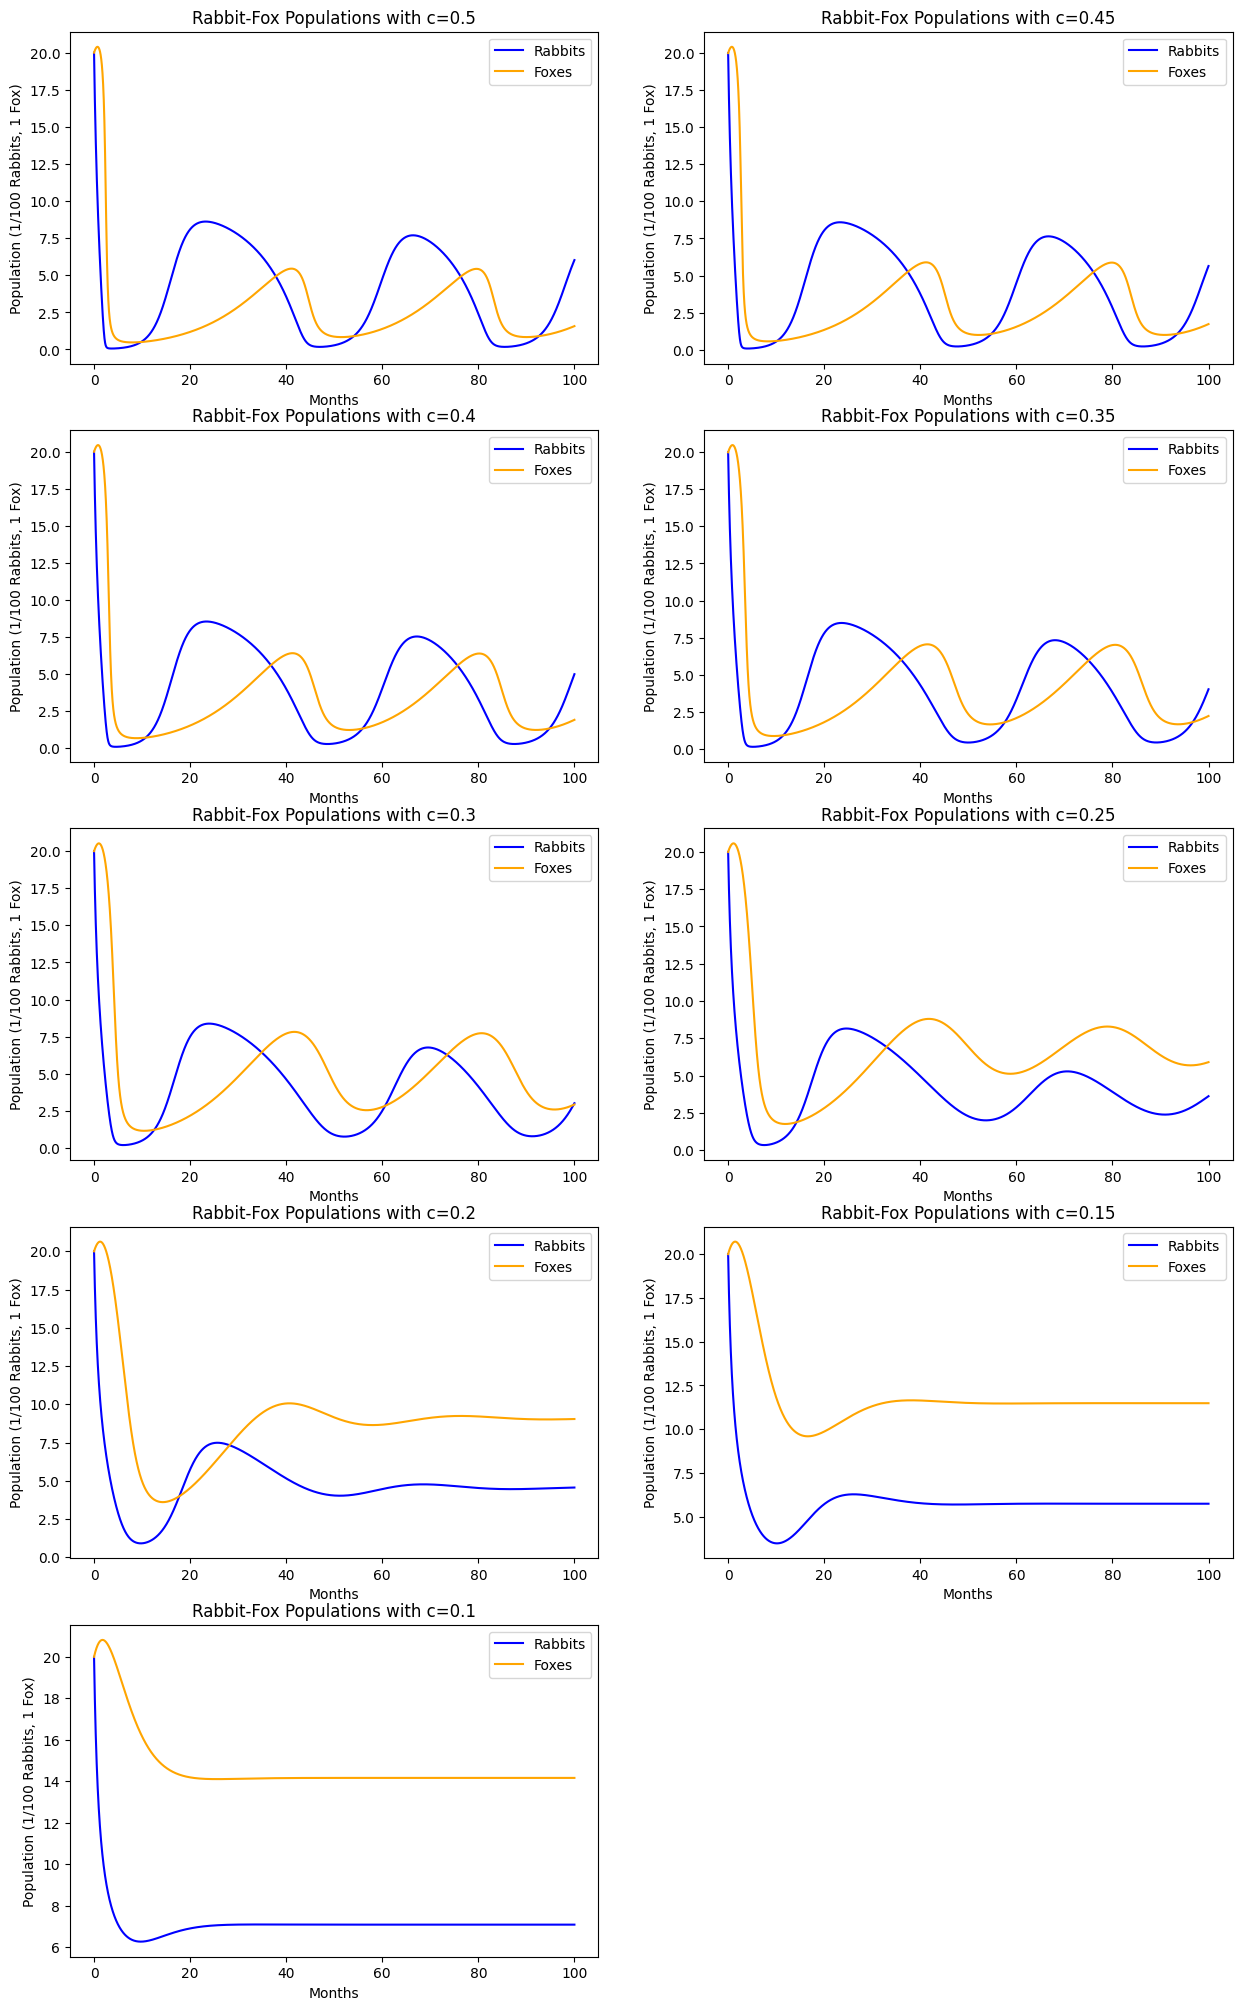

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()

c_vals = np.arange(0.5, 0.05, -0.05)

for i, c in enumerate(c_vals):
    ax = axes[i]
    # Plot the populations
    R_points, F_points, t_points = mayModel(2000, 20, 100, rabbit_sat=c);
    ax.plot(t_points, R_points, color='blue', label='Rabbits');
    ax.plot(t_points, F_points, color='orange', label='Foxes');
    ax.legend(['Rabbits', 'Foxes']);
    ax.set_xlabel('Months');
    ax.set_ylabel('Population (1/100 Rabbits, 1 Fox)');
    ax.set_title(f'Rabbit-Fox Populations with c={round(c,2)}');

axes[-1].axis('off')
plt.show()

As we can see the Hopf bifurcation in the $c$ value occurs between 0.2 and 0.15. The phenomenon we are observing is essentially an equilibrium point where the the fox saturation value perfectly matches growth rate of the rabbit population therefore both populations level out at a constant value.

We can repeat this process for the $d$ value to find the bifurcation there as well.

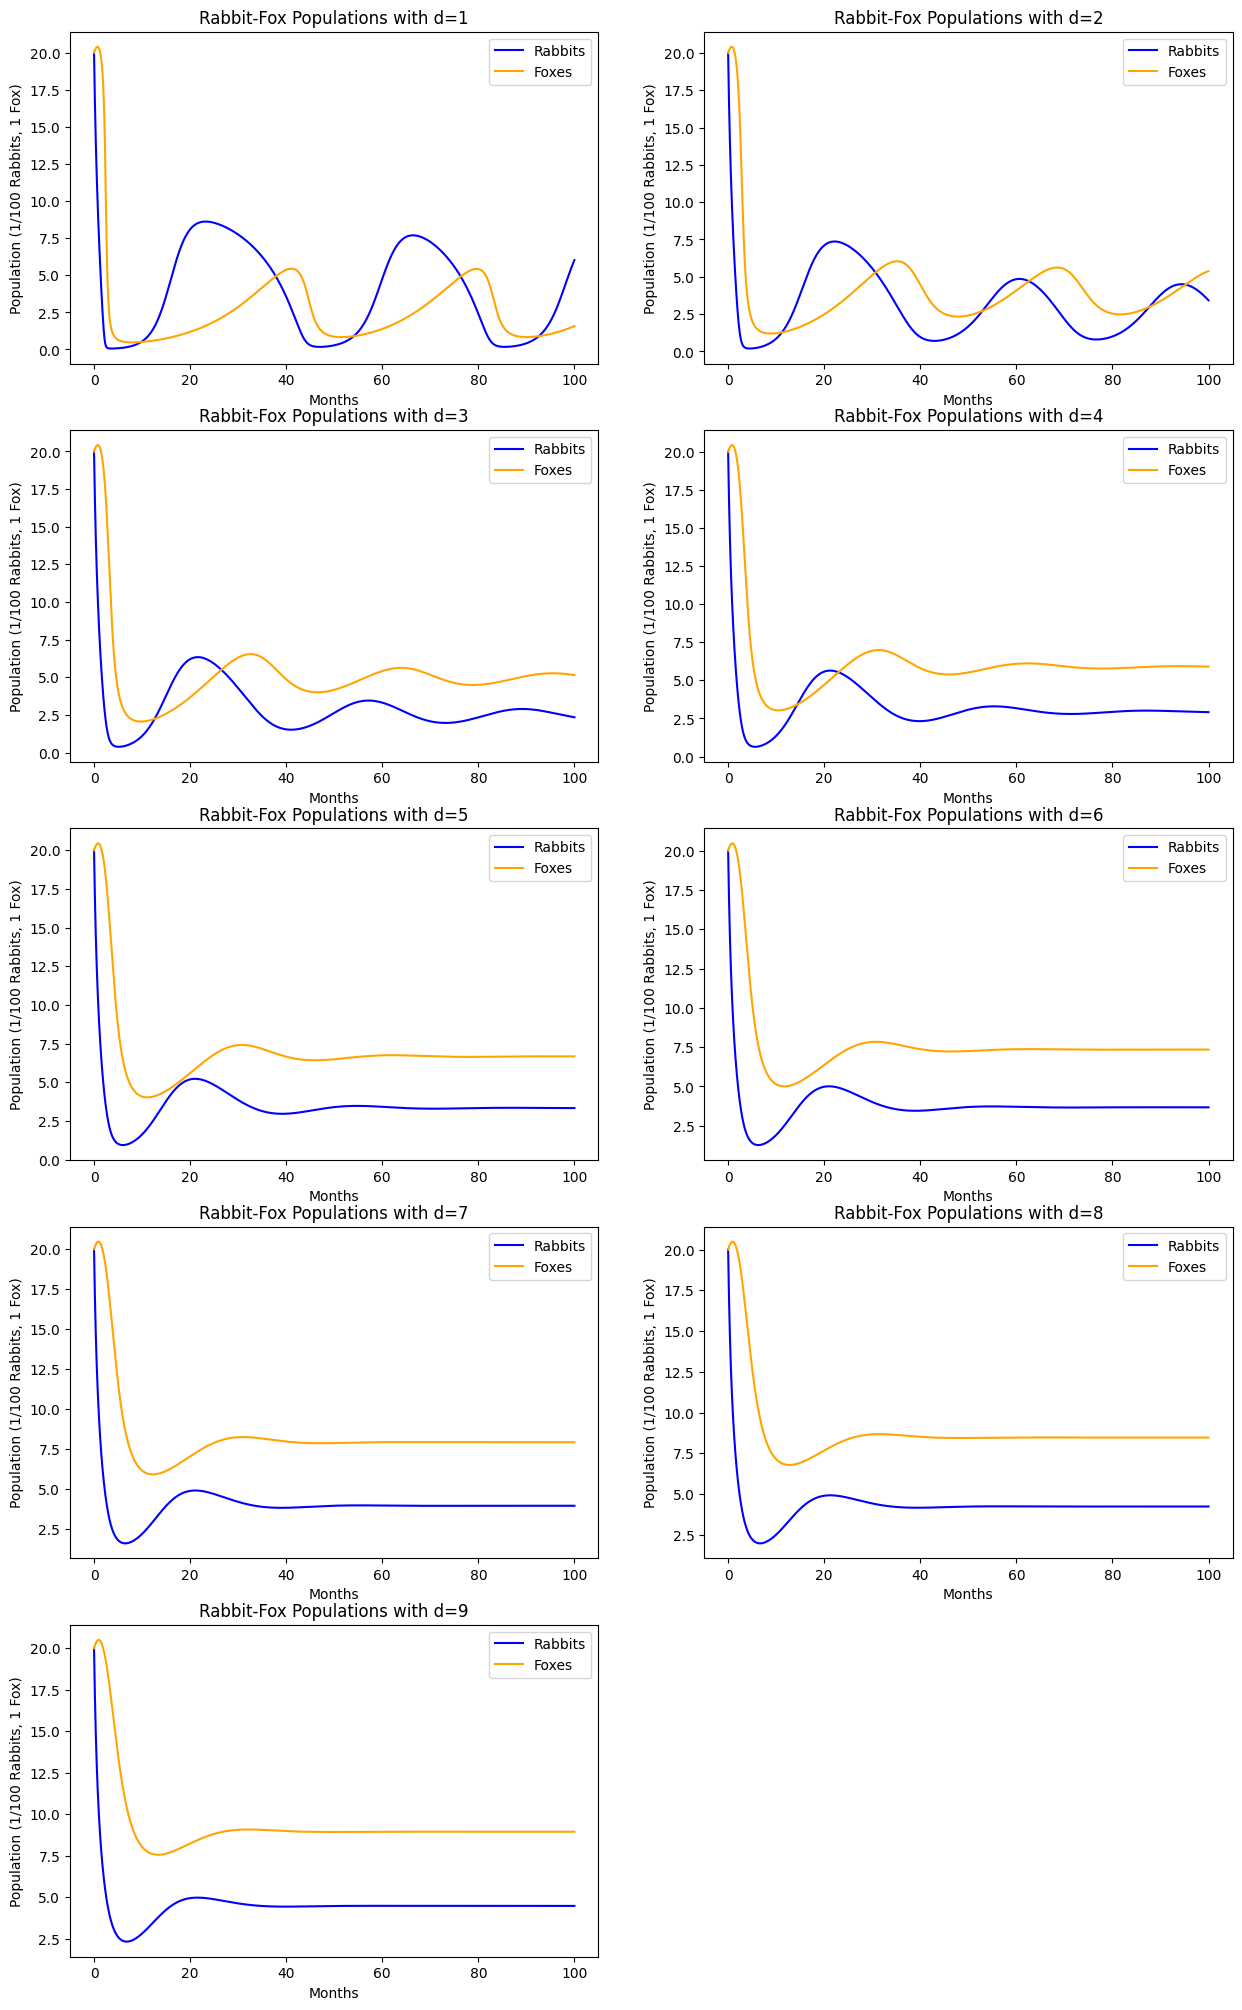

In [11]:
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()

d_vals = np.arange(1, 10, 1)

for i, d in enumerate(d_vals):
    ax = axes[i]
    # Plot the populations
    R_points, F_points, t_points = mayModel(2000, 20, 100, rabbit_sat=0.5, inter_coef=d);
    ax.plot(t_points, R_points, color='blue', label='Rabbits');
    ax.plot(t_points, F_points, color='orange', label='Foxes');
    ax.legend(['Rabbits', 'Foxes']);
    ax.set_xlabel('Months');
    ax.set_ylabel('Population (1/100 Rabbits, 1 Fox)');
    ax.set_title(f'Rabbit-Fox Populations with d={round(d,2)}');

axes[-1].axis('off')
plt.show()

As we can see, this bifurcation occurs with a $d$ value of approx. 5 as well.

**Activity Two:**
Do all parts of 4.1  #8, #9, #10, #11 Fermentation. It's great to discover these equations on your own,however, please check with me and Piazza to make sure you've got them right.

### Problem 8

#### a) differential equation describing growth rate of yeast over time (hours)
$Y$ = yeast population (pounds)

$a$ = growth rate of yeast (yeast per hour per pound of yeast)

$b$ = carrying capacity of yeast in vat (pounds)

*yeast grows logistically*

$$ Y^{\prime} = aY(1 - \frac{Y}{b})$$

Plugging in given initial conditions:

$$ Y^{\prime} = (0.2)(0.5)(1 - \frac{0.5}{10})$$

#### b and c) Graph the differential equation showing capacity thresholds and alternate yeast strain

In [12]:
def fermentationModel(amt_yeast, growth_rate, carrying_cap, t_initial, t_final):
    # set model initial values
    t = t_initial
    # calculate derivative 100 times per timestep
    num_steps = t_final * 100
    Y = amt_yeast
    a = growth_rate
    b = carrying_cap

    # store data for plotting
    Y_data = []
    t_data = []
    half_pt = (math.nan,math.nan)
    one_percent_pt = (math.nan,math.nan)

    # boolean flag indicating points found
    half_pt_found = False
    one_percent_pt_found = False

    # change in time/number of steps
    delta_t = (t_final - t_initial)/num_steps

    for _ in range(0, num_steps):
        # check if at half carrying capacity
        if math.isclose(Y, (b/2), rel_tol=0.001) and not half_pt_found:
            half_pt = (t, Y)
            half_pt_found = True
        
        # check if at 1% carrying capacity
        if math.isclose(Y, (b - (b*0.01)), rel_tol=0.001) and not one_percent_pt_found:
            one_percent_pt = (t, Y)
            one_percent_pt_found = True

        # store current values for plotting
        Y_data.append(Y)
        t_data.append(t)

        # rate of change in yeast pop.
        Yprime = a * Y * (1 - Y / b)

        # calculate incremental pop. change
        delta_Y = Yprime * delta_t

        # update time counter and total pop. values
        Y = Y + delta_Y
        t = t + delta_t

    return Y_data, t_data, half_pt, one_percent_pt

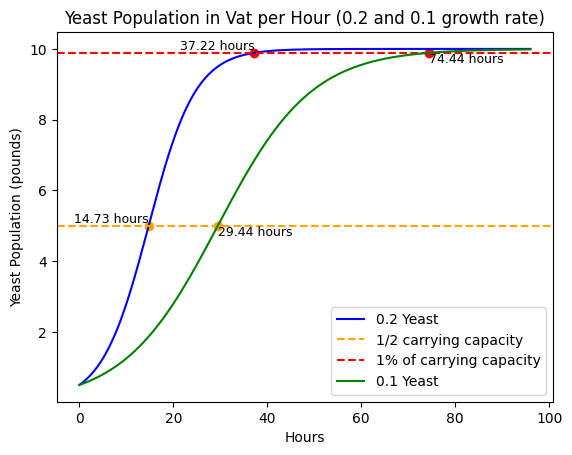

In [13]:
# Yeast population params
# yeast growth rate (yeast per hour per pound of yeast)
y1_growth_rate = 0.2
y2_growth_rate = 0.1

# carrying capacity of yeast in vat (pounds)
carrying_cap = 10

# initial yeast amount (pounds)
init_yeast = 0.5

# initial and final time of model (hours)
t_initial = 0
t_final = 96

# get data for 0.2 growth rate yeast
Y1_pts, t1_pts, half_pt1, one_percent_pt1 = fermentationModel(init_yeast, y1_growth_rate, carrying_cap, t_initial, t_final)
x1, y1 = half_pt1
x2, y2 = one_percent_pt1

# get data for 0.1 growth rate yeast
Y2_pts, t2_pts, half_pt2, one_percent_pt2 = fermentationModel(init_yeast, y2_growth_rate, carrying_cap, t_initial, t_final)
x3, y3 = half_pt2
x4, y4 = one_percent_pt2

# plot for 0.2 growth rate yeast
plt.plot(t1_pts, Y1_pts, color='blue', label='0.2 Yeast');
# 1/2 carrying capacity point and line
plt.scatter(x1, y1, color='orange')
plt.text(x1, y1, f'{round(x1, 2)} hours', fontsize=9, verticalalignment='bottom', horizontalalignment='right')
plt.axhline(y=y1, color='orange', linestyle='--', label='1/2 carrying capacity');
# 1% carry capacity point and line
plt.scatter(x2, y2, color='red')
plt.text(x2, y2, f'{round(x2, 2)} hours', fontsize=9, verticalalignment='bottom', horizontalalignment='right')
plt.axhline(y=y2, color='red', linestyle='--', label='1% of carrying capacity' );

# plot for 0.1 growth rate yeast
plt.plot(t2_pts, Y2_pts, color='green', label='0.1 Yeast');
# 1/2 carrying capacity point and line
plt.scatter(x3, y3, color='orange')
plt.text(x3, y3, f'{round(x3, 2)} hours', fontsize=9, verticalalignment='top', horizontalalignment='left')
# 1% carry capacity point and line
plt.scatter(x4, y4, color='red')
plt.text(x4, y4, f'{round(x4, 2)} hours', fontsize=9, verticalalignment='top', horizontalalignment='left')

# add labels and show plot
plt.legend();
plt.xlabel('Hours');
plt.ylabel('Yeast Population (pounds)');
plt.title('Yeast Population in Vat per Hour (0.2 and 0.1 growth rate)');

The 0.2 growth rate yeast reaches half capacity in 14.73 hours, and is within 1% capacity in 37.22 hours.

The 0.1 growth rate yeast reaches half capacity in 29.44 hours and is within 1% capacity in 74.44 hours.

### Problem 9

#### a) differential equation describing growth rate of alcohol over time (hours)

$c$ = growth rate of alcohol (alcohol per hour per pound of yeast)

*each pound of yeast produces $c$ pounds of alcohol per hour*

$$A^{\prime} = cY$$

Plugging in given growth rate:

$$A^{\prime} = (0.05)Y$$

#### b) toxic effects of alcohol on yeast

$d$ = death rate of yeast (pounds of yeast per hour)

*yeast cells die at a rate proportional the amount of alcohol present and also the amount of yeast present* 

*in each pound of yeast, a pound of alcohol will kill $d$ pounds of yeast per hour*

If there are $Y$ pounds of yeast and $A$ pounds of alcohol:

$dYA$ pounds of yeast die per hour

Plugging in the given death rate, in one hour:

$(0.1)YA$ pounds of yeast die

Updating the yeast grow equation to include alcohol killing yeast:

$$Y^{\prime} = aY(1-\frac{Y}{b}) - dYA$$

Plugging in given rates:

$$Y^{\prime} = (0.2)(Y)(1 - \frac{Y}{10}) - (0.1)YA$$

#### c) graph the updated differential equations

In [14]:
def fermModelIncAlc(amt_yeast, y_growth_rate, y_death_rate, y_carrying_cap, a_growth_rate, t_initial, t_final):
    # set model initial values
    t = t_initial
    # calculate derivative 100 times per timestep
    num_steps = t_final * 100
    Y = amt_yeast
    a = y_growth_rate
    b = y_carrying_cap
    d = y_death_rate
    # initially no alcohol
    A = 0
    c = a_growth_rate

    # store data for plotting
    Y_data = []
    A_data = []
    t_data = []
    peak_yeast_pt = (math.nan,math.nan)
    ferm_end_pt = (math.nan,math.nan)

    # boolean flag indicating points found
    peak_yeast_found = False
    ferm_end_found = False

    # change in time/number of steps
    delta_t = (t_final - t_initial)/num_steps

    for _ in range(0, num_steps):

        if len(Y_data) > 1:
            # check if we have reached peak yeast
            if Y < Y_data[-1] and not peak_yeast_found:
                peak_yeast_pt = (t, Y)
                peak_yeast_found = True

            # check if the fermentation has ended within error bound
            if math.isclose(Y, 0, abs_tol=0.001) and not ferm_end_found:
                ferm_end_pt = (t, A)
                ferm_end_found = True

        # store current values for plotting
        Y_data.append(Y)
        A_data.append(A)
        t_data.append(t)

        # rate of change in yeast pop. including death rate
        Yprime = a * Y * (1 - Y / b) - d * Y * A

        # rate of change in alcohol pop.
        Aprime = c * Y

        # calculate incremental yeast and alcohol pop. change
        delta_Y = Yprime * delta_t
        delta_A = Aprime * delta_t

        # update time counter and total pop. values
        Y = Y + delta_Y
        A = A + delta_A
        t = t + delta_t

    return Y_data, A_data, t_data, peak_yeast_pt, ferm_end_pt

In [15]:
# Yeast population params
# yeast growth rate (yeast per hour per pound of yeast)
y_growth_rate = 0.2

# yeast death rate (pounds per hour)
y_death_rate = 0.1

# Alcohol population params
# alcohol growth rate (alcohol per hour per pound of yeast)
a_growth_rate = 0.05

# carrying capacity of yeast in vat (pounds)
carrying_cap = 10

# initial yeast amount (pounds)
init_yeast = 0.5

# initial and final time of model (hours)
t_initial = 0
t_final = 96

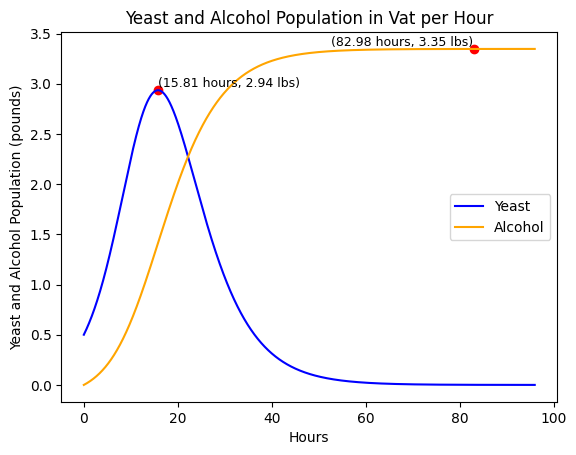

In [16]:
# get fermentation process data
Y_pts1, A_pts1, t_pts1, peak_yeast_pt1, ferm_end_pt1 = fermModelIncAlc(init_yeast, y_growth_rate, y_death_rate, carrying_cap, a_growth_rate, t_initial, t_final)

# peak yeast
x1, y1 = peak_yeast_pt1

# alcohol amount at end of fermentation
x2, y2 = ferm_end_pt1

# plot fermentation process
plt.plot(t_pts1, Y_pts1, color='blue', label='Yeast');
plt.plot(t_pts1, A_pts1, color='orange', label='Alcohol')
# plot peak yeast point
plt.scatter(x1, y1, color='red')
plt.text(x1, y1, f'({round(x1, 2)} hours, {round(y1, 2)} lbs)', fontsize=9, verticalalignment='bottom', horizontalalignment='left')
# plot alcohol amount at end of fermentation point
plt.scatter(x2, y2, color='red')
plt.text(x2, y2, f'({round(x2, 2)} hours, {round(y2, 2)} lbs)', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# add labels and show plot
plt.legend();
plt.xlabel('Hours');
plt.ylabel('Yeast and Alcohol Population (pounds)');
plt.title('Yeast and Alcohol Population in Vat per Hour');

The yeast reaches its peak amount at 15.81 hours with a total of 2.94lbs. This is 7.06lbs less than the yeast population carrying capacity in the vat of 10lbs.

The fermentation ends (Y < 0.001lbs) at 82.98 hours with 3.35lbs of alcohol produced.

### Problem 10

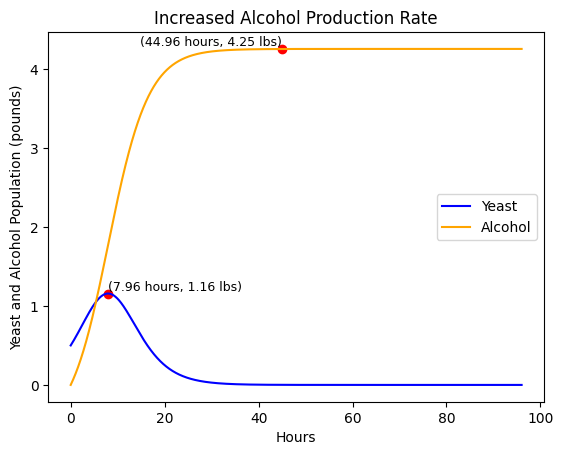

In [17]:
# plot increased alcohol growth rate

# rate of alcohol production increased to 0.25
a_growth_rate_incr = 0.25

# get fermentation process data
Y_pts2, A_pts2, t_pts2, peak_yeast_pt2, ferm_end_pt2 = fermModelIncAlc(init_yeast, y_growth_rate, y_death_rate, carrying_cap, a_growth_rate_incr, t_initial, t_final)

# peak yeast
x3, y3 = peak_yeast_pt2

# alcohol amount at end of fermentation
x4, y4 = ferm_end_pt2

# plot fermentation process
plt.plot(t_pts2, Y_pts2, color='blue', label='Yeast');
plt.plot(t_pts2, A_pts2, color='orange', label='Alcohol')
# plot peak yeast point
plt.scatter(x3, y3, color='red')
plt.text(x3, y3, f'({round(x3, 2)} hours, {round(y3, 2)} lbs)', fontsize=9, verticalalignment='bottom', horizontalalignment='left')
# plot alcohol amount at end of fermentation point
plt.scatter(x4, y4, color='red')
plt.text(x4, y4, f'({round(x4, 2)} hours, {round(y4, 2)} lbs)', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# add labels and show plot
plt.legend();
plt.xlabel('Hours');
plt.ylabel('Yeast and Alcohol Population (pounds)');
plt.title('Increased Alcohol Production Rate');

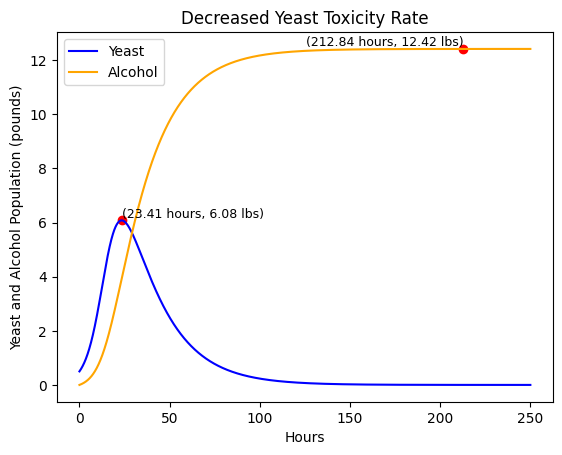

In [18]:
# plot reduced toxicity rate

# increase t_final to see full fermentation process
t_final = 250

# yeast death rate decreased
y_death_rate_decr = 0.02

# get fermentation process data
Y_pts3, A_pts3, t_pts3, peak_yeast_pt3, ferm_end_pt3 = fermModelIncAlc(init_yeast, y_growth_rate, y_death_rate_decr, carrying_cap, a_growth_rate, t_initial, t_final)

# peak yeast
x5, y5 = peak_yeast_pt3

# alcohol amount at end of fermentation
x6, y6 = ferm_end_pt3

# plot fermentation process
plt.plot(t_pts3, Y_pts3, color='blue', label='Yeast');
plt.plot(t_pts3, A_pts3, color='orange', label='Alcohol')
# plot peak yeast point
plt.scatter(x5, y5, color='red')
plt.text(x5, y5, f'({round(x5, 2)} hours, {round(y5, 2)} lbs)', fontsize=9, verticalalignment='bottom', horizontalalignment='left')
# plot alcohol amount at end of fermentation point
plt.scatter(x6, y6, color='red')
plt.text(x6, y6, f'({round(x6, 2)} hours, {round(y6, 2)} lbs)', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# add labels and show plot
plt.legend();
plt.xlabel('Hours');
plt.ylabel('Yeast and Alcohol Population (pounds)');
plt.title('Decreased Yeast Toxicity Rate');

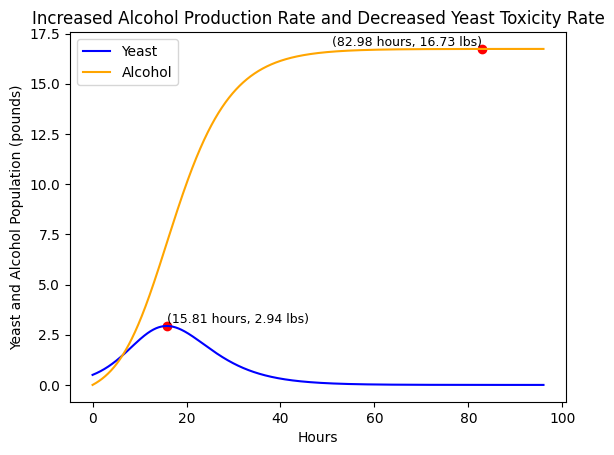

In [19]:
# plot increased alcohol growth rate and reduced toxicity rate

# reset t_final
t_final = 96

# get fermentation process data
Y_pts4, A_pts4, t_pts4, peak_yeast_pt4, ferm_end_pt4 = fermModelIncAlc(init_yeast, y_growth_rate, y_death_rate_decr, carrying_cap, a_growth_rate_incr, t_initial, t_final)

# peak yeast
x7, y7 = peak_yeast_pt4

# alcohol amount at end of fermentation
x8, y8 = ferm_end_pt4

# plot fermentation process
plt.plot(t_pts4, Y_pts4, color='blue', label='Yeast');
plt.plot(t_pts4, A_pts4, color='orange', label='Alcohol')
# plot peak yeast point
plt.scatter(x7, y7, color='red')
plt.text(x7, y7, f'({round(x7, 2)} hours, {round(y7, 2)} lbs)', fontsize=9, verticalalignment='bottom', horizontalalignment='left')
# plot alcohol amount at end of fermentation point
plt.scatter(x8, y8, color='red')
plt.text(x8, y8, f'({round(x8, 2)} hours, {round(y8, 2)} lbs)', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# add labels and show plot
plt.legend();
plt.xlabel('Hours');
plt.ylabel('Yeast and Alcohol Population (pounds)');
plt.title('Increased Alcohol Production Rate and Decreased Yeast Toxicity Rate');

We can see in the first graph above if we increase the alcohol production rate by a factor of 5, we see a decrease in the peak yeast population point from 2.94lbs at 15.81 hours to 1.16lbs at 7.96 hours. We also see the alcohol production increases from 3.35lbs to 4.25lbs and the fermentation process ends at 44.96 hours vs. 82.98 hours with the previous production rate.

In the second graph above, we see that if we instead decrease the yeast toxicity rate (death rate) by a factor of 5, then the peak yeast population point shifts to 6.08lbs at 23.41 hours. We also see that the alcohol production again increases to 12.42lbs, and the fermentation process lasts significantly longer not ending for 212.84 hours.

Finally, in the third graph above, we see that if we increase the alcohol production rate by a factor of 5 and also decrease the yeast toxicity rate by a factor of 5, the peak yeast population point remains the same, as does the length of the fermentation process; however, the alcohol production increases to 16.73lbs—which is interestingly a factor of 5 increase!

### Problem 11

#### a) differential equation describing sugar amount rate of change over time (hours)

*Yeast consumes 0.15lbs of sugar per hour, per lb of yeast*

$e$ = rate of change of sugar amount (pounds of sugar per hour per pound of yeast)

$$S^{\prime} = -eY$$

Plugging in the given rate of change:

$$S^{\prime} = -(0.15)Y$$

#### b) differential equation describing vat carrying capacity of yeast in proportion to sugar

*the carrying capacity of $S$ lb of sugar is $0.4S$ lb of yeast*

Said another way, $S$ pounds of sugar can support $0.4S$ pounds of yeast.

Therefore, 10 lb of yeast requires $0.4S$.

Sovling for $S$ we have:

$$10Y = 0.4S$$

$$S = \frac{10}{0.4} = 25lbs$$

Therefore, to maintain a carrying capacity of 10lb of yeast we would need 25lbs of sugar.

Scaling this by a factor of 10 would mean that to maintain 1lb of yeast we would need 2.5lbs of sugar.

Updating our yeast growth rate equation we get:

$f$ = ratio of sugar to yeast to maintain carrying capacity

$$Y^{\prime} = aY(1-\frac{Y}{fS}) - dYA$$

Plugging in given rates:

$$Y^{\prime} = (0.2)(Y)(1 - \frac{Y}{0.4S}) - (0.1)YA$$

#### c) graph the full fermentation model

In [20]:
def fullFermModel(y_amt, y_growth_rate, y_death_rate, y_carrying_cap, a_growth_rate, s_amt, s_growth_rate, t_initial, t_final):
    # set model initial values
    t = t_initial
    # calculate derivative 100 times per timestep
    num_steps = t_final * 100
    # yeast initial conditions
    Y = y_amt
    a = y_growth_rate
    b = y_carrying_cap
    d = y_death_rate
    # alcohol initial conditions
    A = 0
    c = a_growth_rate
    # sugar initial conditions
    S = s_amt
    e = s_growth_rate

    # store data for plotting
    Y_data = []
    A_data = []
    S_data = []
    t_data = []
    peak_yeast_pt = (math.nan,math.nan)
    alch_end_pt = (math.nan,math.nan)
    sugar_end_pt = (math.nan,math.nan)

    # boolean flag indicating points found
    peak_yeast_found = False
    ferm_end_found = False

    # change in time/number of steps
    delta_t = (t_final - t_initial)/num_steps

    for _ in range(0, num_steps):

        if len(Y_data) > 1:
            # check if we have reached peak yeast
            if Y < Y_data[-1] and not peak_yeast_found:
                peak_yeast_pt = (t, Y)
                peak_yeast_found = True

            # check if the fermentation has ended within error bound
            # record alcohol and sugar amounts
            if math.isclose(Y, 0, abs_tol=0.001) and not ferm_end_found:
                ferm_end_pt = (t, Y)
                alch_end_pt = (t, A)
                sugar_end_pt = (t, S)
                ferm_end_found = True

        # store current values for plotting
        Y_data.append(Y)
        A_data.append(A)
        S_data.append(S)
        t_data.append(t)

        # rate of change in yeast pop. including death rate
        Yprime = a * Y * (1 - Y / b) - d * Y * A

        # rate of change in alcohol amount
        Aprime = c * Y

        # rate of change in sugar amount
        Sprime = -e * Y

        # calculate incremental yeast, alcohol, and sugar changes
        delta_Y = Yprime * delta_t
        delta_A = Aprime * delta_t
        delta_S = Sprime * delta_t

        # update time counter and total pop. values
        Y = Y + delta_Y
        A = A + delta_A
        S = S + delta_S
        t = t + delta_t

    return Y_data, A_data, S_data, t_data, peak_yeast_pt, alch_end_pt, sugar_end_pt

In [21]:
# Yeast params
# yeast growth rate (yeast per hour per pound of yeast)
y_growth_rate = 0.2
# yeast death rate (pounds per hour)
y_death_rate = 0.1
# initial yeast amount (pounds)
y_init = 0.5
# carrying capacity of yeast in vat (pounds)
y_carrying_cap = 10

# Alcohol params
# alcohol growth rate (alcohol per hour per pound of yeast)
a_growth_rate = 0.05

# Sugar params
# sugar growth rate (pounds of sugar per hour per pound of yeast)
s_growth_rate = 0.15
# initial sugar amount (pounds)
s_init = 25

# initial and final time of model (hours)
t_initial = 0
t_final = 96

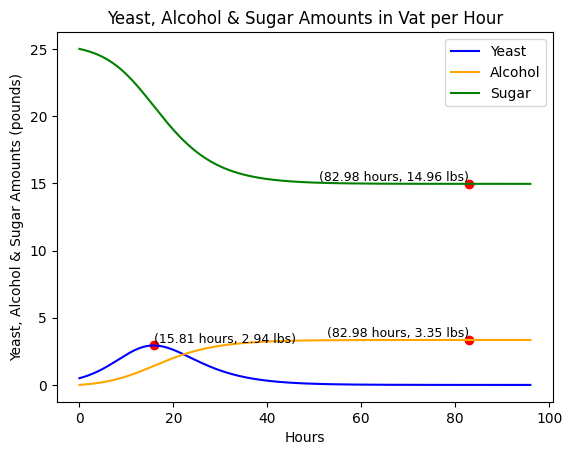

In [22]:
# get fermentation process data
Y_pts5, A_pts5, S_pts5, t_pts5, peak_yeast_pt5, alch_end_pt5, sugar_end_pt = fullFermModel(y_init, y_growth_rate, y_death_rate, y_carrying_cap, a_growth_rate, s_init, s_growth_rate, t_initial, t_final)

# peak yeast
x9, y9 = peak_yeast_pt5

# alcohol amount at end of fermentation
x10, y10 = alch_end_pt5

# sugar amount at end of fermentation process
x11, y11 = sugar_end_pt

# plot fermentation process
plt.plot(t_pts5, Y_pts5, color='blue', label='Yeast');
plt.plot(t_pts5, A_pts5, color='orange', label='Alcohol');
plt.plot(t_pts5, S_pts5, color='green', label='Sugar')
# plot peak yeast point
plt.scatter(x9, y9, color='red')
plt.text(x9, y9, f'({round(x9, 2)} hours, {round(y9, 2)} lbs)', fontsize=9, verticalalignment='bottom', horizontalalignment='left')
# plot alcohol end point
plt.scatter(x10, y10, color='red')
plt.text(x10, y10, f'({round(x10, 2)} hours, {round(y10, 2)} lbs)', fontsize=9, verticalalignment='bottom', horizontalalignment='right')
# plot sugar end point
plt.scatter(x11, y11, color='red')
plt.text(x11, y11, f'({round(x11, 2)} hours, {round(y11, 2)} lbs)', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# add labels and show plot
plt.legend();
plt.xlabel('Hours');
plt.ylabel('Yeast, Alcohol & Sugar Amounts (pounds)');
plt.title('Yeast, Alcohol & Sugar Amounts in Vat per Hour');

With 0.5lbs of yeast and 25lbs of sugar, the fermentation process evolves as described in the graph above. The processes last for approx. 82.98 hours, at which point there is: 0lbs of yeast (within 0.001lbs), 3.35lbs of alcohol, and 14.96lbs of sugar. The peak yeast level is at 15.81 hours with 2.94lbs.

**Activity Three:**
Choose any of the models from the book to expand upon and develop. This does not have to be super complex, please scale it to the time you have available.
+ The simple Lotka-Volterra model from #7 is easy to expand to a complex ecosystem with MANY equations (mice, foxes, bears, aliens, and can accomodate a Zombie Apocolypse)
+ Expand SIR, add complexities with immunity, other diseases (try Chicken Pox and Shingles together),add deaths, more variables, or compare various epidemic responses.
+ Check out the examples in 4.1 #12-#14(Newton's Cooling, can you see applications to crime scene investigations?)
+ Check out 4.1 #19-#24 from more ideas
+ If you did this activity in Linear Algebra and/or want a challenge, look up research papers about modeling with differential equations and try to reproduce the model - this could be a start for a final project.

### Newton Warming Model: real life application

For this portion of the activity, I want to try and apply the Newton Cooling model to solve a real world problem I regularly encounter—how long should I leave meat out on the counter for to defrost it. I regularly defrost meat in this manner but (as my food safety inclined cousin regularly informs me) this is risky because if you leave the meat out too long, dangerous bacteria can form.

My goal is to develop upon the Newton Cooling Model and invert it  to determine exactly how long I should leave the meat out for to reach a safe defrosted temperature.

#### 1. setup the differential equation describing the warming of the meat

Following the Newton Cooling Law we have:

$$Q^{\prime} = -k(Q - r)$$

where,

$k$ = rate of temperature change (degrees per minute per degree of difference)

$Q$ = initial temperature of the meat out of the freezer

$r$ = the ambient temperature of the room

Right now, the ambient temperature is my apartment is $68^\circ\mathrm{F}$ and my freezer is set to $0^\circ\mathrm{F}$.

Plugging these values into the equation above we get:

$$Q^{\prime} = -k(0 - 68)$$

Now all we need is an estimate for $k$. After doing some googling, it turns out the problem of defrosting meat is actually incredibly complicated and challenging problem to model correctly (who knew)! For example, this paper from the NIH blew my mind with the level of complexity involved: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5105633/

I couldn't find any good references online, so I'm just going to go with the book value of $0.2$ which I fully realize is probably not accurate for meat given the complexities involved, but it will have to do in this instance.

With this value, we now have our warming differential equation:

$$Q^{\prime} = -0.2(0 - 68)$$

We can now plot this to model the meat defrosting.

#### 2. graph the model

In [23]:
def defrostingModel(meat_temp, air_temp, warming_coef, t_final, t_initial=0):
    # set the initial conditions
    t = t_initial
    num_steps = t_final * 100   # 100 time slices per time step
    Q = meat_temp   # degrees F
    r = air_temp   # degrees F
    k = warming_coef   # degrees F per minute per degree diff.

    # store values for plotting
    Q_data = []
    t_data = []

    defrost_pt = (math.nan, math.nan)
    defrost_pt_found = False

    delta_t = (t_final - t_initial)/num_steps

    for _ in range(0, num_steps):
        # check if defrosting complete
        if math.isclose(Q, r, rel_tol=0.01) and not defrost_pt_found:
            defrost_pt = (t, Q)
            defrost_pt_found = True
        
        # store current values for plotting
        Q_data.append(Q)
        t_data.append(t)

        # calculate rate of change of meat temp.
        Qprime = -k * (Q - r)

        # calculate incremental temp change
        delta_Q = Qprime * delta_t

        # update time counter and temp values
        Q = Q + delta_Q
        t = t + delta_t

    return Q_data, t_data, defrost_pt

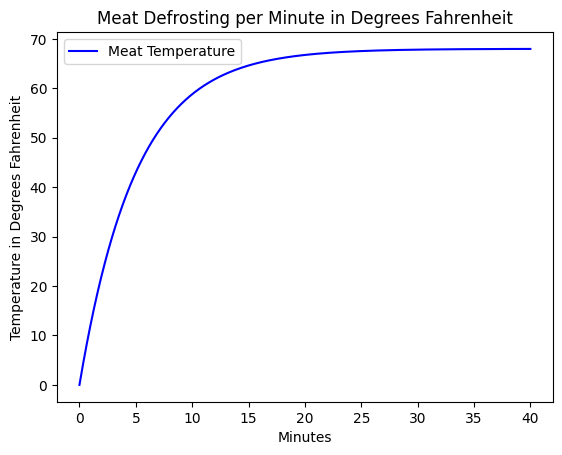

In [24]:
# Plot the warming graph
Q_pts, t_pts, defrost_pt = defrostingModel(0, 68, 0.2, 40)
plt.plot(t_pts, Q_pts, color='blue');
plt.legend(['Meat Temperature']);
plt.xlabel('Minutes');
plt.ylabel('Temperature in Degrees Fahrenheit');
plt.title('Meat Defrosting per Minute in Degrees Fahrenheit');

#### 3. evaluate and adjust

Looking at this model, I can immediately tell that the $k$ value is incorrect, as this model shows the meat should almost be at room temperature in ~25 min—which from experience is definitely not accurate. Let's try another method to determine $k$.

Based on the USDA website, they say it usually take 18-36 hours for boneless meat to defrost in the refrigerator (note: the type of meat and size are two other variables that need to be accounted for in the more complex version of this model). According to Home Depot, the standard fridge temperature is $37^\circ\mathrm{F}$. So, if we split the difference between 18 and 36 days at 24 hours and set our model initial conditions to 37 degrees, we should be able to iteratively test values of $k$ until we reach approx. 24 hours for defrosting—which should give us a better approximation for $k$ than we have currently.

10


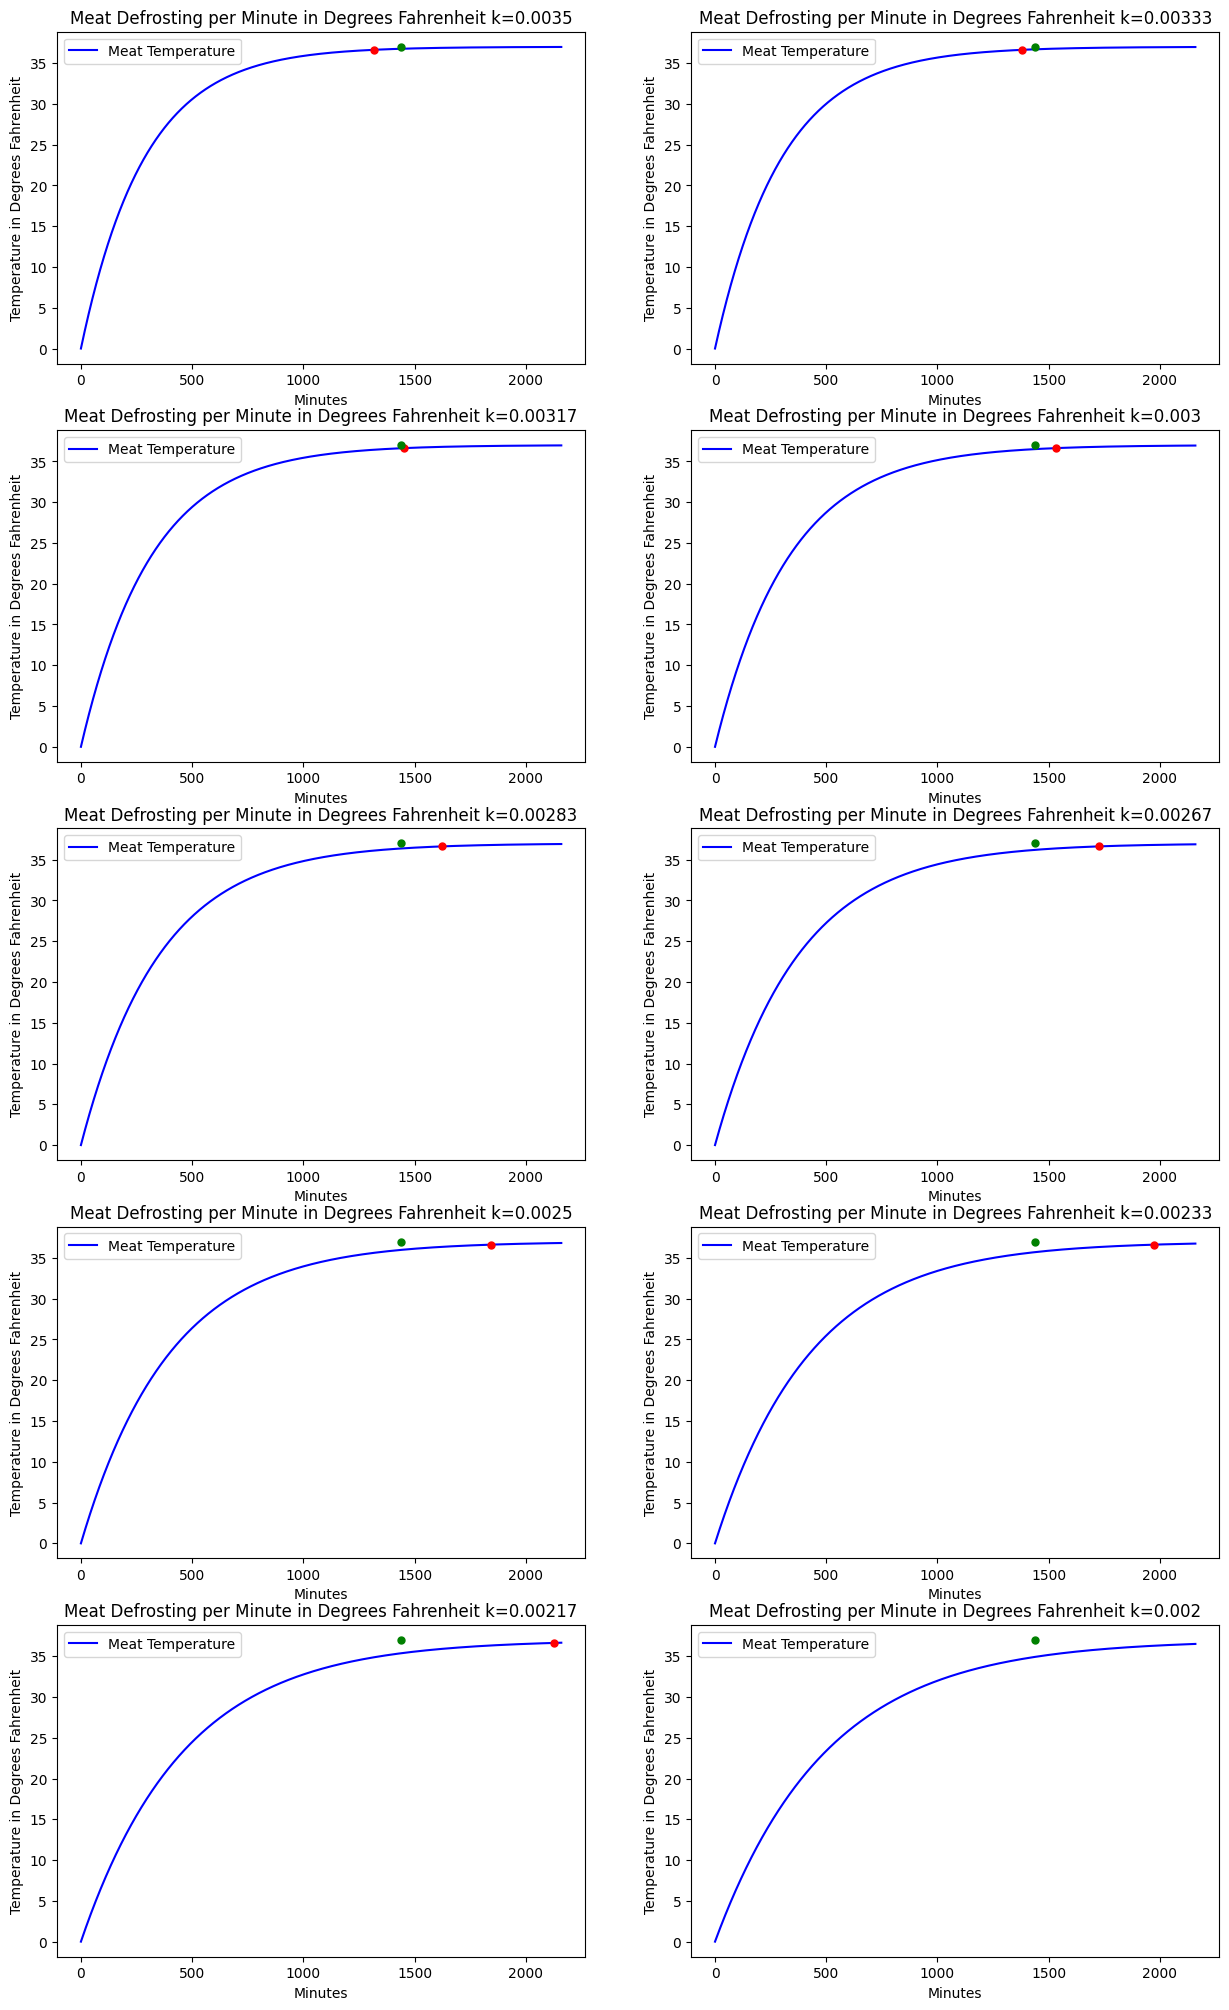

In [25]:
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()

k_vals = np.linspace(0.0035, 0.002, 10)
print(len(k_vals))
for i, k in enumerate(k_vals):
    ax = axes[i]
    # set time to plot over 36 hours = 2160 minutes
    Q_pts, t_pts, defrost_pt = defrostingModel(0, 37, k, 2160)
    time, temp = defrost_pt
    ax.plot(t_pts, Q_pts, color='blue');
    # plot our goal defrost time and temp
    ax.plot(time, temp, marker='o', markersize=5, color='red');
    # plot point at assumption defrost time
    ax.plot(1440, 37, marker='o', markersize=5, color='green');
    # plot line at fridge temp
    ax.legend(['Meat Temperature']);
    ax.set_xlabel('Minutes');
    ax.set_ylabel('Temperature in Degrees Fahrenheit');
    ax.set_title(f'Meat Defrosting per Minute in Degrees Fahrenheit k={round(k, 5)}');

plt.show()

Ok so as we can see from this graph above, our meat is done defrosting in the fridge after 24 hours with a $k$ value of approx. $0.00317$. Let's go back to our room temperature model and see if this value for $k$ makes sense.

(Note: I had to iterate the values of k in the linspace numerous times to get the graphs shown above using a manual version of binary search).

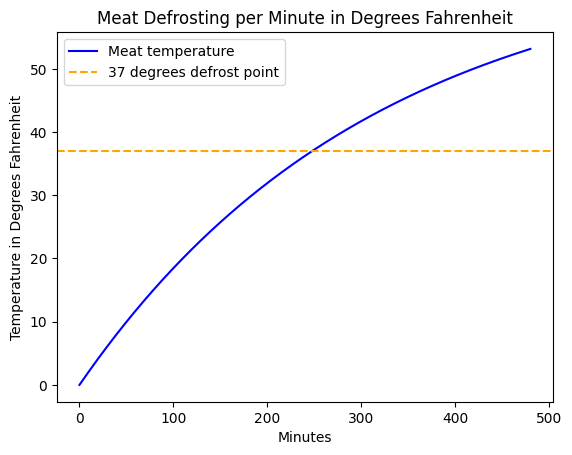

In [26]:
# Plot the warming graph with new k value
# plot over 8 hours = 720 minutes
Q_pts, t_pts, defrost_pt = defrostingModel(0, 68, 0.00317, 480)
plt.plot(t_pts, Q_pts, color='blue', label='Meat temperature');
plt.axhline(y=37, color='orange', linestyle='--', label='37 degrees defrost point');
plt.legend();
plt.xlabel('Minutes');
plt.ylabel('Temperature in Degrees Fahrenheit');
plt.title('Meat Defrosting per Minute in Degrees Fahrenheit');

So while somewhat crude, we can see that with our very, very rough estimate of the $k$ coefficient, using the Newton Cooling Model, the meat on the counter in my apartment should reach a safe defrost temp in approx. 4 hours—which passes the sniff test in terms of how long it seems to take.

Now if I place the meat in the sun...